## Import modules

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
%matplotlib inline
import matplotlib

## Request

In [2]:
url = "http://books.toscrape.com/"
responce = requests.get(url)
soup = BeautifulSoup(responce.content, "html.parser")

In [3]:
books_html = soup.find_all("article",class_="product_pod")
books_html

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

## Parsing _one_ book

In [4]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [5]:
books_html[0].find("h3").find("a")

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [6]:
books_html[0].find("p",class_="price_color").string

'£51.77'

In [7]:
book_price = float(books_html[0].find("p",class_="price_color").string[1:])
book_price

51.77

In [8]:
books_starts_html = books_html[0].find("p",class_="star-rating")
books_starts_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [9]:
books_starts_html.attrs["class"]

['star-rating', 'Three']

In [10]:
def parse_rating(rating_classes):
    ratings = {
        "One": 1,
        "Two": 2,
        "Three": 3,
        "Four": 4,
        "Five": 5
    }
    for key, value in ratings.items():
        if key in rating_classes:
            return value
    return 0

In [11]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Pasing all Books

In [12]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
for book in books_html:
    title = book.find("h3").find("a").attrs["title"]
    price = float(books_html[0].find("p",class_="price_color").string[1:])
    rating = parse_rating(book.find("p",class_="star-rating").attrs["class"])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

In [13]:
books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
  51.77,
 

In [14]:
len(books_dict)

3

In [15]:
len(books_dict["Title"])

20

### Loading to Dataframe

In [16]:
books_df = pd.DataFrame.from_dict(books_dict)
# books_df.index = range(1, len(books_df) + 1)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,51.77,1
2,Soumission,51.77,1
3,Sharp Objects,51.77,4
4,Sapiens: A Brief History of Humankind,51.77,5
5,The Requiem Red,51.77,1
6,The Dirty Little Secrets of Getting Your Dream...,51.77,4
7,The Coming Woman: A Novel Based on the Life of...,51.77,3
8,The Boys in the Boat: Nine Americans and Their...,51.77,4
9,The Black Maria,51.77,1


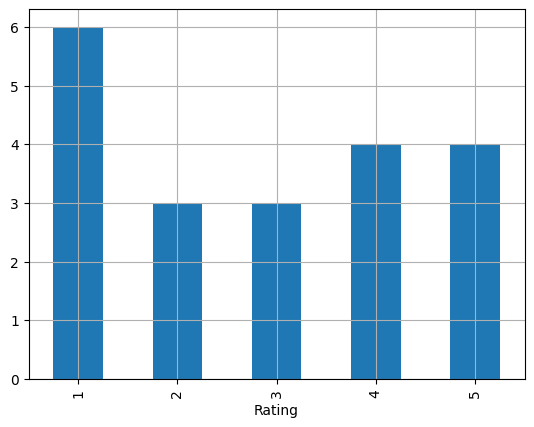

In [17]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar").grid(True)

## Going through all the pages of the catalogue

In [18]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [19]:
max_page = 3
for page in range(1, max_page+1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)
    

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [20]:
all_books_dict = { "Title": [], "Price": [], "Rating": [] }
max_page = 50
for page in range(1, max_page + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    responce = requests.get(url)
    soup = BeautifulSoup(responce.content, "html.parser")
#     books_html = soup.find_all("article", class_="product_pod")
    for book in soup.find_all("article", class_="product_pod"):
#         title = book.find("h3").find("a").attrs["title"]
#         price = float(books_html[0].find("p",class_="price_color").string[1:])
#         rating = parse_rating(book.find("p",class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(book.find("h3").find("a").attrs["title"])
        all_books_dict["Price"].append(float(books_html[0].find("p",class_="price_color").string[1:]))
        all_books_dict["Rating"].append(parse_rating(book.find("p",class_="star-rating").attrs["class"]))

In [21]:
all_books_dict

{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas",
  'In Her Wake',
  'How Music Works',
  'Foolproof Preserving: A Guide to Small Batch Jams, Jellies, Pickles, Condiments, and More: A Foolproof Guide to Making Smal

In [22]:
len(all_books_dict["Title"])

1000

In [23]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
995,Alice in Wonderland (Alice's Adventures in Won...,51.77,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",51.77,4
997,A Spy's Devotion (The Regency Spies of London #1),51.77,5
998,1st to Die (Women's Murder Club #1),51.77,1
999,"1,000 Places to See Before You Die",51.77,5


<Axes: >

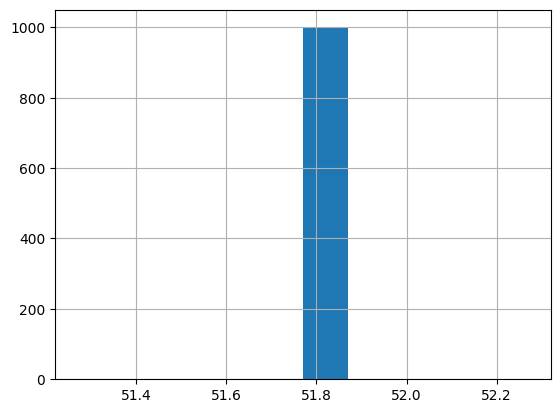

In [24]:
all_books_df["Price"].hist()

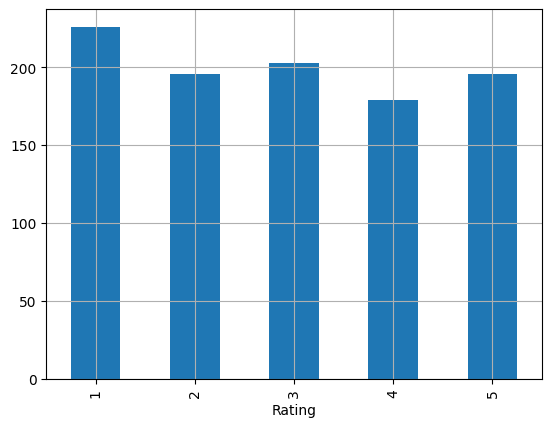

In [25]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar").grid(True)

In [26]:
all_books_df.to_csv("books.csv")

In [27]:
all_books_df.to_excel("books.xlsx", sheet_name="Books")